# Prediction of Autism by logistic regression
<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#preprocessing">Data pre-processing and selection</a></li>
        <li><a href="#modeling">Modeling (Logistic Regression with Scikit-learn)</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of toddlers that contained influential features to be utilised for further analysis especially in determining autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (Q-Chat-10) plus other individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. 

In [15]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="about_dataset">About the dataset</h2>

<b>Data Type:</b> Predictive and Descriptive: Nominal / categorical, binary and continuous    
<b>Task:</b> Classification   
<b>Attribute Type:</b> Categorical, continuous and binary     
<b>Area:</b> Medical, health and social science   
<b>Format Type:</b> Non-Matrix   
<b>Does your data set contain missing values?</b> No   
<b>Number of Instances (records in your data set):</b> 1054   
<b>Number of Attributes (fields within each record): </b>18 including the class variable    
<b>Attribute Information:</b>  For Further information about the attributes/feature see below table.   

<b>Attributes:   </b>
A1-A10: Items within Q-Chat-10  in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset. For questions 1-9 (A1-A9) in Q-chat-10,  if the respose was  Sometimes / Rarly / Never “1” is assigned to the question (A1-A9). However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question. If the user obtained More than 3 Add points together for all ten questions. If your child scores more than 3 (Q-chat-10- score) then there is a potential ASD traits otherwise no ASD traits are observed.


###  Load the data 

In [41]:
address='C:/Users/HP/Desktop/Toddler Autism dataset July 2018.csv'
Autism_df = pd.read_csv(address)
Autism_df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Sexb,Sex,Ethnicity,Jaundice,Jaundiceb,Family_mem_with_ASD,Family_mem_with_ASDb,Who completed the test,Class,ADS
0,1,0,0,0,0,0,0,1,1,0,...,f,1,middle eastern,1,yes,0,no,family member,No,0
1,2,1,1,0,0,0,1,1,0,0,...,m,0,White European,1,yes,0,no,family member,Yes,1
2,3,1,0,0,0,0,0,1,1,0,...,m,0,middle eastern,1,yes,0,no,family member,Yes,1
3,4,1,1,1,1,1,1,1,1,1,...,m,0,Hispanic,0,no,0,no,family member,Yes,1
4,5,1,1,0,1,1,1,1,1,1,...,f,1,White European,0,no,1,yes,family member,Yes,1


<h2 id="preprocessing">Data pre-processing and selection</h2>

Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:


In [17]:
Autism_df = Autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6','A7','A8','A9','A10','Age_Mons','Sex','Jaundice','Family_mem_with_ASD','ADS']]
Autism_df['ADS'] = Autism_df['ADS'].astype('int')
Autism_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,ADS
0,0,0,0,0,0,0,1,1,0,1,28,1,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,0,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,0,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,1,0,1,1


In [18]:
Autism_df.shape

(1054, 15)

Lets define X, and y for our dataset:

In [19]:
X = np.asarray(Autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6','A7','A8','A9','A10','Age_Mons','Sex','Jaundice','Family_mem_with_ASD','ADS']])
X[0:5]

array([[ 0,  0,  0,  0,  0,  0,  1,  1,  0,  1, 28,  1,  1,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  1,  0,  0,  0, 36,  0,  1,  0,  1],
       [ 1,  0,  0,  0,  0,  0,  1,  1,  0,  1, 36,  0,  1,  0,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 24,  0,  0,  0,  1],
       [ 1,  1,  0,  1,  1,  1,  1,  1,  1,  1, 20,  1,  0,  1,  1]],
      dtype=int64)

In [20]:
y = np.asarray(Autism_df['ADS'])
y [0:5]

array([0, 1, 1, 1, 1])

Also, we normalize the dataset:

In [8]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13635573, -0.90228244, -0.8187579 , -1.02497983, -1.05061526,
        -1.16757385,  0.7339524 ,  1.0852124 , -0.9793405 ,  0.83994144,
         0.01665219,  1.51791806,  1.63086548, -0.43852901, -1.4943657 ],
       [ 0.88000612,  1.10830041, -0.8187579 , -1.02497983, -1.05061526,
         0.85647687,  0.7339524 , -0.9214786 , -0.9793405 , -1.19055919,
         1.01958993, -0.65879709,  1.63086548, -0.43852901,  0.66918024],
       [ 0.88000612, -0.90228244, -0.8187579 , -1.02497983, -1.05061526,
        -1.16757385,  0.7339524 ,  1.0852124 , -0.9793405 ,  0.83994144,
         1.01958993, -0.65879709,  1.63086548, -0.43852901,  0.66918024],
       [ 0.88000612,  1.10830041,  1.22136226,  0.97562895,  0.95182322,
         0.85647687,  0.7339524 ,  1.0852124 ,  1.02109532,  0.83994144,
        -0.48481667, -0.65879709, -0.61317136, -0.43852901,  0.66918024],
       [ 0.88000612,  1.10830041, -0.8187579 ,  0.97562895,  0.95182322,
         0.85647687,  0.7339524 ,  1.0852124 , 

## Train/Test dataset

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (843, 15) (843,)
Test set: (211, 15) (211,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Now we can predict using our test set:

In [23]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [24]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.12269955, 0.87730045],
       [0.12228179, 0.87771821],
       [0.04929532, 0.95070468],
       [0.06797939, 0.93202061],
       [0.60602875, 0.39397125],
       [0.08579982, 0.91420018],
       [0.08432242, 0.91567758],
       [0.65140795, 0.34859205],
       [0.05057672, 0.94942328],
       [0.15756391, 0.84243609],
       [0.10397921, 0.89602079],
       [0.61091861, 0.38908139],
       [0.69997137, 0.30002863],
       [0.13318635, 0.86681365],
       [0.46299393, 0.53700607],
       [0.06139813, 0.93860187],
       [0.28210364, 0.71789636],
       [0.20768638, 0.79231362],
       [0.19313328, 0.80686672],
       [0.37136471, 0.62863529],
       [0.07415179, 0.92584821],
       [0.03435269, 0.96564731],
       [0.69662824, 0.30337176],
       [0.69804522, 0.30195478],
       [0.59798612, 0.40201388],
       [0.4359078 , 0.5640922 ],
       [0.0529376 , 0.9470624 ],
       [0.58893948, 0.41106052],
       [0.70960261, 0.29039739],
       [0.0597162 , 0.9402838 ],
       [0.

<h2 id="preprocessing">Evaluation</h2>

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

    

In [36]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)


0.9415584415584416

### confusion matrix

Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[145   0]
 [  9  57]]


Confusion matrix, without normalization
[[145   0]
 [  9  57]]


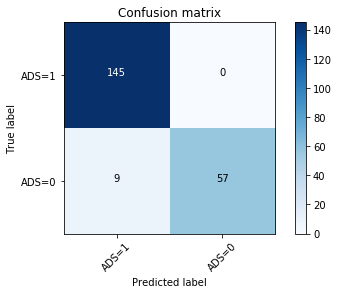

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ADS=1','ADS=0'],normalize= False,  title='Confusion matrix')

Look at first row. The first row is for Samples whose actual ADS value in test set is 1.
As you can calculate, out of 211 customers, the churn value of 145 of them is 1. 
And out of these 145, the classifier correctly predicted 145 of them as 1, and 0 of them as 0. 

It means, for 145 samples, the actual ADS value were 1 in test set, and classifier also correctly predicted those as 1. 

What about the samples with ADS value 0? Lets look at the second row.
It looks like  there were 57 customers whom their ADS value were 0. 


The classifier correctly predicted 57 of them as 0.and 9 of them wrongly as 1 So, it has done a good job in predicting the samples with ADS value 1. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 

In [39]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        66
           1       0.94      1.00      0.97       145

    accuracy                           0.96       211
   macro avg       0.97      0.93      0.95       211
weighted avg       0.96      0.96      0.96       211



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 1.0 in our case.

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [40]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.25636419958456347